In [ ]:
pip install spacy pyLDAvis

     |████████████████████████████████| 1.6MB 8.1MB/s 
     |████████████████████████████████| 552kB 43.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7d6578e8875fd225c21058494a0319caf0d74dfdfc3a0a16988ed9ab1a89f181
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=21ad2f03f285a511b61dfc040bf30ef544aa383eac892a54aac4675b8f6ab9c6
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
pip install spacy

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/Articles.csv')

In [ ]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['WASHINGTON — Congressional Republicans have a new fear when it comes to '
 'their health care lawsuit against the Obama administration: They might win. '
 'The incoming Trump administration could choose to no longer defend the '
 'executive branch against the suit, which challenges the administration’s '
 'authority to spend billions of dollars on health insurance subsidies for and '
 'Americans, handing House Republicans a big victory on issues. But a sudden '
 'loss of the disputed subsidies could conceivably cause the health care '
 'program to implode, leaving millions of people without access to health '
 'insurance before Republicans have prepared a replacement. That could lead to '
 'chaos in the insurance market and spur a political backlash just as '
 'Republicans gain full control of the government. To stave off that outcome, '
 'Republicans could find themselves in the awkward position of appropriating '
 'huge sums to temporarily prop up the Obama health care law, angerin

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['washington', 'congressional', 'republicans', 'have', 'new', 'fear', 'when', 'it', 'comes', 'to', 'their', 'health', 'care', 'lawsuit', 'against', 'the', 'obama', 'administration', 'they', 'might', 'win', 'the', 'incoming', 'trump', 'administration', 'could', 'choose', 'to', 'no', 'longer', 'defend', 'the', 'executive', 'branch', 'against', 'the', 'suit', 'which', 'challenges', 'the', 'administration', 'authority', 'to', 'spend', 'billions', 'of', 'dollars', 'on', 'health', 'insurance', 'subsidies', 'for', 'and', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'on', 'issues', 'but', 'sudden', 'loss', 'of', 'the', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'the', 'health', 'care', 'program', 'to', 'implode', 'leaving', 'millions', 'of', 'people', 'without', 'access', 'to', 'health', 'insurance', 'before', 'republicans', 'have', 'prepared', 'replacement', 'that', 'could', 'lead', 'to', 'chaos', 'in', 'the', 'insurance', 'market', 'and', 'spur', 'politic

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['washington', 'congressional_republicans', 'have', 'new', 'fear', 'when', 'it', 'comes', 'to', 'their', 'health_care', 'lawsuit', 'against', 'the', 'obama_administration', 'they', 'might', 'win', 'the', 'incoming', 'trump', 'administration', 'could', 'choose', 'to', 'no_longer', 'defend', 'the', 'executive_branch', 'against', 'the', 'suit', 'which', 'challenges', 'the', 'administration', 'authority', 'to', 'spend', 'billions', 'of', 'dollars', 'on', 'health_insurance', 'subsidies', 'for', 'and', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'on', 'issues', 'but', 'sudden', 'loss', 'of', 'the', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'the', 'health_care', 'program', 'to', 'implode', 'leaving', 'millions', 'of', 'people', 'without', 'access', 'to', 'health_insurance', 'before', 'republicans', 'have', 'prepared', 'replacement', 'that', 'could', 'lead', 'to', 'chaos', 'in', 'the', 'insurance', 'market', 'and', 'spur', 'political', 'backlash', 'just', 

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['new', 'fear', 'come', 'lawsuit', 'obama_administration', 'may', 'win', 'incoming', 'administration', 'could', 'choose', 'longer', 'defend', 'suit', 'challenge', 'spend', 'billion', 'dollar', 'health_insurance', 'subsidy', 'hand', 'house', 'republican', 'big', 'victory', 'issue', 'sudden', 'loss', 'dispute', 'subsidy', 'could', 'conceivably', 'cause', 'program', 'implode', 'leave', 'million', 'people', 'access', 'health_insurance', 'republican', 'prepare', 'replacement', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'republican', 'gain', 'full', 'control', 'government', 'stave', 'outcome', 'could', 'find', 'awkward', 'position', 'appropriate', 'huge', 'sum', 'temporarily', 'prop', 'law', 'anger', 'conservative', 'voter', 'demand', 'end', 'law', 'year', 'twist', 'worry', 'preserve', 'prerogative', 'could', 'choose', 'fight', 'republican', 'ally', 'dispute', 'eager', 'avoid', 'ugly', 'political', 'pileup', 'capitol_hill', 'trump', 'transition_team', 

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 6), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 8), (48, 2), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 6), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"coverage" + 0.015*"wound" + 0.014*"target" + 0.013*"kill" + '
  '0.010*"train" + 0.010*"article" + 0.009*"attack" + 0.008*"water" + '
  '0.007*"passenger" + 0.007*"city"'),
 (1,
  '0.034*"say" + 0.014*"would" + 0.006*"president" + 0.006*"make" + '
  '0.006*"law" + 0.005*"trump" + 0.005*"take" + 0.005*"also" + 0.005*"could" + '
  '0.005*"go"'),
 (2,
  '0.018*"say" + 0.009*"go" + 0.008*"make" + 0.007*"year" + 0.007*"time" + '
  '0.006*"take" + 0.006*"first" + 0.006*"get" + 0.005*"know" + 0.005*"work"'),
 (3,
  '0.020*"company" + 0.014*"say" + 0.012*"percent" + 0.009*"year" + '
  '0.007*"pay" + 0.006*"new" + 0.006*"work" + 0.006*"market" + 0.006*"make" + '
  '0.006*"job"'),
 (4,
  '0.013*"show" + 0.012*"time" + 0.009*"write" + 0.009*"story" + 0.006*"book" '
  '+ 0.006*"play" + 0.006*"make" + 0.005*"world" + 0.005*"also" + 0.005*"new"'),
 (5,
  '0.026*"drug" + 0.015*"scientist" + 0.014*"human" + 0.013*"study" + '
  '0.010*"cell" + 0.010*"researcher" + 0.009*"doctor" + 0.009*

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.03436770636473

Coherence Score:  0.38155207976541206


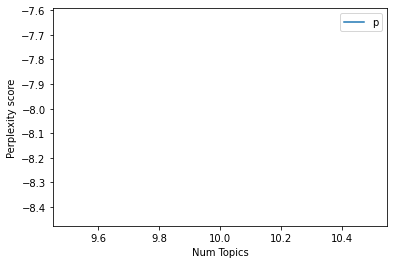

In [ ]:
x = lda_model.num_topics
plt.plot(x,lda_model.log_perplexity(corpus))
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.185220 -0.106097       1        1  29.671339
2     -0.153486  0.051523       2        1  19.897110
7     -0.123949 -0.109762       3        1  15.174701
3     -0.119125 -0.119761       4        1  11.169248
9     -0.129089  0.107342       5        1   8.277361
4     -0.076719  0.035227       6        1   7.919016
8      0.036550  0.277944       7        1   3.365779
0      0.246106 -0.093316       8        1   1.817122
5      0.265695  0.002355       9        1   1.370117
6      0.239237 -0.045454      10        1   1.338205, topic_info=            Term          Freq         Total Category  logprob  loglift
201          say  10119.000000  10119.000000  Default  30.0000  30.0000
981        woman   1139.000000   1139.000000  Default  29.0000  29.0000
1061     company   1044.000000   1044.000000  Default  28.0000  28.0000
192       report    725.000000    725.000000  Default  27.0000  27.0000
491       family    899.000000    899.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
3472  compromise     18.331932     46.346638  Topic10  -5.7140   3.3863
953          use     33.957504    739.644775  Topic10  -5.0975   1.2328
2310   operation     21.601522    157.153732  Topic10  -5.5499   2.3294
1125        fact     21.469227    218.362976  Topic10  -5.5560   1.9943
1319       study     19.672514    333.898865  Topic10  -5.6434   1.4822

[742 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
250       1  0.882976  action
250       3  0.076666  action
250       5  0.039655  action
2622      1  0.041349   actor
2622      6  0.723614   actor
...     ...       ...     ...
991       2  0.311712   young
991       3  0.108307   young
991       5  0.346053   young
991       6  0.095098   young
991       7  0.134723   young

[1654 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 8, 4, 10, 5, 9, 1, 6, 7])

In [ ]:
df['content'].str.lower().str.split()


0      [washington, —, congressional, republicans, ha...
1      [after, the, bullet, shells, get, counted,, th...
2      [when, walt, disney’s, “bambi”, opened, in, 19...
3      [death, may, be, the, great, equalizer,, but, ...
4      [seoul,, south, korea, —, north, korea’s, lead...
                             ...                        
988    [the, weather, in, new, york, city, saw, a, 62...
989    [manila, —, a, fire, raced, through, a, squali...
990    [the, new, york, times, magazine, won, three, ...
991    [a, man, everyone, calls, cheese, won, somalia...
992    [denver, —, the, army, approved, the, construc...
Name: content, Length: 993, dtype: object

In [ ]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha=50/20,
                                           per_word_topics=True)

In [ ]:
pprint(lda_model_2.print_topics())
doc_lda = lda_model_2[corpus]

[(0,
  '0.020*"official" + 0.018*"travel" + 0.015*"airport" + 0.013*"train" + '
  '0.012*"people" + 0.010*"line" + 0.010*"test" + 0.010*"fly" + 0.009*"area" + '
  '0.009*"say"'),
 (1,
  '0.013*"would" + 0.010*"president" + 0.009*"trump" + 0.009*"former" + '
  '0.009*"official" + 0.008*"administration" + 0.008*"issue" + 0.008*"vote" + '
  '0.008*"office" + 0.007*"law"'),
 (2,
  '0.012*"study" + 0.010*"human" + 0.010*"scientist" + 0.009*"find" + '
  '0.009*"may" + 0.008*"food" + 0.007*"researcher" + 0.006*"make" + '
  '0.006*"use" + 0.006*"science"'),
 (3,
  '0.045*"company" + 0.019*"business" + 0.015*"pay" + 0.012*"money" + '
  '0.011*"sell" + 0.011*"financial" + 0.010*"employee" + 0.009*"executive" + '
  '0.009*"accord" + 0.009*"work"'),
 (4,
  '0.025*"report" + 0.013*"email" + 0.011*"russian" + 0.011*"document" + '
  '0.011*"story" + 0.010*"information" + 0.009*"write" + 0.009*"publish" + '
  '0.008*"claim" + 0.008*"journalist"'),
 (5,
  '0.101*"time" + 0.072*"take" + 0.044*"new" + 0.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.056271874436371

Coherence Score:  0.42241823804910494


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.191199  0.025587       1        1  9.322326
17     0.217059 -0.007705       2        1  7.167345
18     0.143641  0.043680       3        1  6.981822
16    -0.056350 -0.130556       4        1  6.933228
7     -0.188954  0.077750       5        1  6.288587
14     0.096538 -0.066980       6        1  6.159097
6      0.145419  0.185688       7        1  5.429650
12     0.006175 -0.062715       8        1  4.972701
15    -0.168520  0.083956       9        1  4.966027
3     -0.083721 -0.169987      10        1  4.702076
2      0.039354 -0.191177      11        1  4.634088
19    -0.050516 -0.068758      12        1  4.468485
4     -0.020446 -0.059903      13        1  4.424478
10    -0.098071  0.139655      14        1  3.917716
11    -0.074276  0.128966      15        1  3.808946
13    -0.062309 -0.146320      16        1  3.369417
9      0.115485  0.056157      17        1  3.220019
8      0.097560  0.038543      18        1  3.179348
0     -0.047828  0.123830      19        1  3.072776
5      0.180957  0.000292      20        1  2.981864, topic_info=      Term         Freq        Total Category  logprob  loglift
201    say  9907.000000  9907.000000  Default  30.0000  30.0000
226   time  2002.000000  2002.000000  Default  29.0000  29.0000
221   take  1838.000000  1838.000000  Default  28.0000  28.0000
244  would  2676.000000  2676.000000  Default  27.0000  27.0000
847   show   967.000000   967.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
889  still   123.017456   789.818787  Topic20  -4.6115   1.6531
180    put    98.037453   488.826874  Topic20  -4.8385   1.9060
158  place    98.635101   520.319641  Topic20  -4.8324   1.8496
528    get    94.350128  1031.050537  Topic20  -4.8769   1.1213
833    see    85.048615  1173.643433  Topic20  -4.9807   0.8880

[1291 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
8498      2  0.994919  abortion
3071      7  0.950836   absence
3952     12  0.315634     abuse
3952     15  0.679827     abuse
248       1  0.097213    accord
...     ...       ...       ...
991       6  0.254209     young
991       9  0.020752     young
991      12  0.025940     young
991      15  0.127105     young
991      17  0.054473     young

[2668 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 18, 19, 17, 8, 15, 7, 13, 16, 4, 3, 20, 5, 11, 12, 14, 10, 9, 1, 6])

In [ ]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha=5/20,
                                           per_word_topics=True)

In [ ]:
pprint(lda_model_2.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"kill" + 0.019*"attack" + 0.014*"official" + 0.013*"wound" + '
  '0.013*"say" + 0.011*"target" + 0.010*"area" + 0.010*"train" + 0.010*"city" '
  '+ 0.009*"soldier"'),
 (1,
  '0.034*"say" + 0.016*"would" + 0.009*"law" + 0.008*"official" + '
  '0.007*"administration" + 0.007*"vote" + 0.007*"trump" + 0.006*"government" '
  '+ 0.006*"president" + 0.006*"former"'),
 (2,
  '0.010*"make" + 0.008*"may" + 0.007*"way" + 0.006*"think" + 0.006*"show" + '
  '0.006*"look" + 0.006*"human" + 0.005*"idea" + 0.005*"part" + 0.005*"much"'),
 (3,
  '0.018*"delivery" + 0.014*"navient" + 0.011*"innate" + 0.007*"revival" + '
  '0.007*"grammys" + 0.007*"copyright" + 0.007*"hedge_fund" + 0.006*"edition" '
  '+ 0.006*"gaze" + 0.005*"architecture"'),
 (4,
  '0.015*"brand" + 0.013*"patriot" + 0.013*"ad" + 0.012*"photo" + 0.009*"book" '
  '+ 0.008*"print" + 0.008*"tap" + 0.008*"time" + 0.008*"search" + '
  '0.008*"guest"'),
 (5,
  '0.026*"tribe" + 0.025*"neanderthal" + 0.014*"ship" + 0.013*"specie" + 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.00908191866907

Coherence Score:  0.4389363954162282


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_2, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.248658 -0.042458       1        1  23.134289
1      0.233084  0.048225       2        1  14.674115
16     0.234299 -0.063879       3        1  13.376220
17     0.234244 -0.051075       4        1  10.730221
14     0.145923 -0.122994       5        1   7.312866
7      0.165978  0.196170       6        1   5.401985
19     0.140515  0.046269       7        1   5.397151
2      0.115945 -0.207634       8        1   4.953540
0      0.000701  0.233736       9        1   2.317224
9     -0.006691  0.233657      10        1   2.214472
13    -0.065497 -0.001491      11        1   1.977055
12    -0.110114 -0.023660      12        1   1.865659
10    -0.078129 -0.008837      13        1   1.678865
11    -0.048003 -0.094126      14        1   1.460460
4     -0.109333 -0.076151      15        1   1.337263
18    -0.183205 -0.015550      16        1   0.760288
5     -0.229093 -0.010641      17        1   0.433688
6     -0.231580 -0.011535      18        1   0.417144
8     -0.232284 -0.013736      19        1   0.357888
3     -0.225420 -0.014291      20        1   0.199617, topic_info=            Term          Freq         Total Category  logprob  loglift
201          say  10138.000000  10138.000000  Default  30.0000  30.0000
981        woman    978.000000    978.000000  Default  29.0000  29.0000
1061     company   1020.000000   1020.000000  Default  28.0000  28.0000
401      country   1239.000000   1239.000000  Default  27.0000  27.0000
226         time   1981.000000   1981.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
4587      roller      2.285535      3.136589  Topic20  -5.8934   5.9000
4931       amuse      2.247639      3.098693  Topic20  -5.9101   5.8954
5715  hedge_fund      5.529788      8.925955  Topic20  -5.0098   5.7377
6948     edition      5.212485     11.518235  Topic20  -5.0689   5.4237
6253  adaptation      3.657088     15.780361  Topic20  -5.4233   4.7544

[1243 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11381     17  0.803380  aboriginal
8498       2  0.108395    abortion
8498      13  0.888838    abortion
248        1  0.052455      accord
248        2  0.387488      accord
...      ...       ...         ...
991        1  0.103532       young
991        4  0.527761       young
991        5  0.207064       young
991        7  0.078280       young
991       10  0.083331       young

[2474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 2, 17, 18, 15, 8, 20, 3, 1, 10, 14, 13, 11, 12, 5, 19, 6, 7, 9, 4])

In [ ]:
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model_3.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"kill" + 0.024*"attack" + 0.015*"wound" + 0.015*"official" + '
  '0.014*"target" + 0.011*"military" + 0.011*"soldier" + 0.010*"train" + '
  '0.010*"shoot" + 0.009*"area"'),
 (1,
  '0.031*"say" + 0.016*"would" + 0.010*"official" + 0.008*"administration" + '
  '0.007*"government" + 0.007*"vote" + 0.007*"former" + 0.007*"president" + '
  '0.007*"rule" + 0.006*"trump"'),
 (2,
  '0.010*"make" + 0.007*"look" + 0.007*"way" + 0.006*"think" + 0.006*"may" + '
  '0.006*"show" + 0.006*"wear" + 0.005*"part" + 0.005*"work" + 0.005*"go"'),
 (3,
  '0.055*"patriot" + 0.009*"ms_peter" + 0.008*"revival" + 0.008*"grammys" + '
  '0.006*"hedge_fund" + 0.006*"architecture" + 0.005*"ego" + 0.005*"edition" + '
  '0.005*"rogue" + 0.005*"adaptation"'),
 (4,
  '0.022*"story" + 0.019*"time" + 0.016*"editor" + 0.014*"reader" + 0.012*"ad" '
  '+ 0.011*"photo" + 0.011*"book" + 0.009*"tap" + 0.009*"search" + '
  '0.008*"guest"'),
 (5,
  '0.024*"neanderthal" + 0.022*"tribe" + 0.015*"coyote" + 0.014*"speci

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.992856110710322

Coherence Score:  0.4757599446162013


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_3, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.270927  0.044070       1        1  28.136883
1     -0.235627 -0.095104       2        1  13.725201
16    -0.247146  0.041727       3        1  12.791216
17    -0.244477  0.070454       4        1  10.914102
2     -0.131095  0.214362       5        1   5.758433
19    -0.154685 -0.044574       6        1   5.624232
7     -0.160906 -0.235305       7        1   5.332370
14    -0.091222  0.144647       8        1   4.921668
0      0.030024 -0.199122       9        1   2.018617
9      0.041967 -0.208411      10        1   1.771328
12     0.111378  0.006143      11        1   1.663940
10     0.103279  0.012509      12        1   1.412841
13     0.095519 -0.015115      13        1   1.406905
4      0.089631  0.078826      14        1   1.395070
11     0.044870  0.103923      15        1   1.258751
18     0.174488  0.027655      16        1   0.686738
5      0.212547  0.012743      17        1   0.395425
6      0.211521  0.014213      18        1   0.365340
8      0.214342  0.011145      19        1   0.302322
3      0.206520  0.015215      20        1   0.118619, topic_info=            Term          Freq         Total Category  logprob  loglift
201          say  10218.000000  10218.000000  Default  30.0000  30.0000
981        woman    960.000000    960.000000  Default  29.0000  29.0000
1061     company   1017.000000   1017.000000  Default  28.0000  28.0000
226         time   1982.000000   1982.000000  Default  27.0000  27.0000
155       people   2273.000000   2273.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
5715  hedge_fund      2.945430      8.323729  Topic20  -5.1192   5.6981
6948     edition      2.493290     10.457220  Topic20  -5.2859   5.3033
6253  adaptation      2.394316     14.256460  Topic20  -5.3264   4.9529
7262         sue      1.300893     47.737194  Topic20  -5.9364   3.1343
7392    comeback      1.152054     10.741428  Topic20  -6.0579   4.5044

[1228 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11381     17  0.900567  aboriginal
8498       2  0.327567    abortion
8498       6  0.109189    abortion
8498      19  0.545946    abortion
5365       1  0.973682  absolutely
...      ...       ...         ...
11186      9  0.914384      yemeni
991        1  0.161635       young
991        4  0.613709       young
991        8  0.151533       young
991       10  0.073241       young

[2342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 2, 17, 18, 3, 20, 8, 15, 1, 10, 13, 11, 14, 5, 12, 19, 6, 7, 9, 4])

In [ ]:
import os 
def install_java_jdk():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-8-openjdk-amd64'
  !java -version

install_java_jdk()

openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip #download mallet
!unzip mallet-2.0.8.zip #install mallet

--2020-05-05 14:10:09--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
mallet-2.0.8.zip: Operation not supported

Cannot write to ‘mallet-2.0.8.zip’ (Operation not supported).
unzip:  cannot find or open mallet-2.0.8.zip, mallet-2.0.8.zip.zip or mallet-2.0.8.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive'
/content/gdrive


In [ ]:
os.environ["MALLET_HOME"] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=15, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


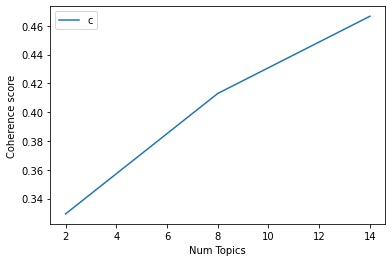

In [ ]:
# Show graph
limit=15; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('law', 0.03621958121109225),
   ('plan', 0.01827956989247312),
   ('state', 0.018166383701188456),
   ('federal', 0.017034521788341823),
   ('rule', 0.016468590831918505),
   ('people', 0.0144878324844369),
   ('change', 0.013073005093378607),
   ('policy', 0.013016411997736276),
   ('repeal', 0.01035653650254669),
   ('make', 0.00967741935483871)]),
 (10,
  [('order', 0.036466358500256806),
   ('country', 0.02756377332648519),
   ('official', 0.01888945956742567),
   ('refugee', 0.01546538834674428),
   ('immigration', 0.014609370541573932),
   ('people', 0.010957027906180448),
   ('government', 0.01044341722307824),
   ('policy', 0.010329281515722193),
   ('ban', 0.010329281515722193),
   ('travel', 0.009986874393654055)]),
 (15,
  [('show', 0.03797707519838771),
   ('play', 0.02223201914598816),
   ('film', 0.017130620985010708),
   ('make', 0.012407104169290842),
   ('television', 0.011273460133518076),
   ('movie', 0.010580677667212495),
   ('good', 0.0103917369945837),
 

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Show graph
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

NameError: ignored

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3328
Num Topics = 8  has Coherence Value of 0.419
Num Topics = 14  has Coherence Value of 0.4525


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


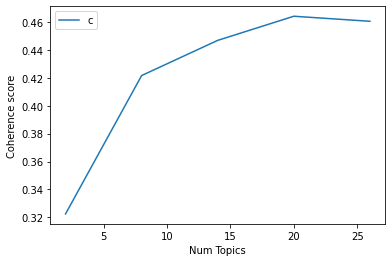

In [ ]:
# Show graph
limit=30; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3225
Num Topics = 8  has Coherence Value of 0.4216
Num Topics = 14  has Coherence Value of 0.4468
Num Topics = 20  has Coherence Value of 0.4641
Num Topics = 26  has Coherence Value of 0.4605


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.992856110710322

Coherence Score:  0.4757599446162013


In [ ]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha=50/20,
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.056271874436371

Coherence Score:  0.42241823804910494


In [ ]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha=5/20,
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.009081567424419

Coherence Score:  0.4389363954162282


In [ ]:
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha=0.2,
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.008085850226346

Coherence Score:  0.45056468122069654


In [ ]:
# Show graph
limit=30; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.2,
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.037107497480392

Coherence Score:  0.38155207976541206


In [ ]:
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_3 = CoherenceModel(model=lda_model_3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_3 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.037147833136395

Coherence Score:  0.38155207976541206


In [ ]:
lda_model_4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=50, 
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_4.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_4 = CoherenceModel(model=lda_model_4, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_4 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.048046120338514

Coherence Score:  0.38155207976541206


In [ ]:
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=50, 
                                           update_every=10,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_5.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_5 = CoherenceModel(model=lda_model_5, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_5 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.475098245823004

Coherence Score:  0.38155207976541206


In [ ]:
lda_model_6 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           update_every=10,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_6.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_6 = CoherenceModel(model=lda_model_6, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_6 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.197094141853771

Coherence Score:  0.38155207976541206


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


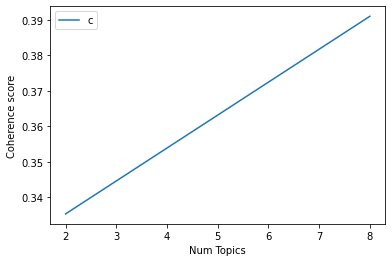

In [ ]:
# Show graph
limit=10; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3354
Num Topics = 8  has Coherence Value of 0.3911


In [ ]:
lda_model_7 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_7.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_7 = CoherenceModel(model=lda_model_7, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_7 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.99901849910038

Coherence Score:  0.38155207976541206


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


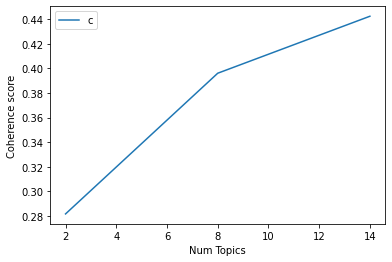

In [ ]:
# Show graph
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2815
Num Topics = 8  has Coherence Value of 0.3961
Num Topics = 14  has Coherence Value of 0.4425


In [ ]:
lda_model_8 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_8.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_8 = CoherenceModel(model=lda_model_8, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_8 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.996456110503389

Coherence Score:  0.38155207976541206


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model_8 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model_8, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_content = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_content*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_content*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_content*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [ ]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)


    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus= corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
df_1 = pd.read_csv('Articles.csv')
# Print head
df_1.head()

,content
0,WASHINGTON — Congressional Republicans have...
1,"After the bullet shells get counted, the blood..."
2,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,"Death may be the great equalizer, but it isn’t..."
4,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
df_1['content'] = df_1['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df_1['content'] = df_1['content'].map(lambda x: x.lower())
# Print out the first rows of papers
df_1['content'].head()

0    washington  —   congressional republicans have...
1    after the bullet shells get counted the blood ...
2    when walt disney’s “bambi” opened in 1942 crit...
3    death may be the great equalizer but it isn’t ...
4    seoul south korea  —   north korea’s leader ki...
Name: content, dtype: object

In [ ]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df_1.content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['washington', 'congressional', 'republicans', 'have', 'new', 'fear', 'when', 'it', 'comes', 'to', 'their', 'health', 'care', 'lawsuit', 'against', 'the', 'obama', 'administration', 'they', 'might', 'win', 'the', 'incoming', 'trump', 'administration', 'could', 'choose', 'to', 'no', 'longer', 'defend', 'the', 'executive', 'branch', 'against', 'the', 'suit', 'which', 'challenges', 'the', 'administration', 'authority', 'to', 'spend', 'billions', 'of', 'dollars', 'on', 'health', 'insurance', 'subsidies', 'for', 'and', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'on', 'issues', 'but', 'sudden', 'loss', 'of', 'the', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'the', 'health', 'care', 'program', 'to', 'implode', 'leaving', 'millions', 'of', 'people', 'without', 'access', 'to', 'health', 'insurance', 'before', 'republicans', 'have', 'prepared', 'replacement', 'that', 'could', 'lead', 'to', 'chaos', 'in', 'the', 'insurance', 'market', 'and', 'spur', 'politic

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['new', 'fear', 'come', 'lawsuit', 'obama_administration', 'may', 'win', 'incoming', 'administration', 'could', 'choose', 'longer', 'defend', 'suit', 'challenge', 'spend', 'billion', 'dollar', 'health_insurance', 'subsidy', 'hand', 'house', 'republican', 'big', 'victory', 'issue', 'sudden', 'loss', 'dispute', 'subsidy', 'could', 'conceivably', 'cause', 'program', 'implode', 'leave', 'million', 'people', 'access', 'health_insurance', 'republican', 'prepare', 'replacement', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'republican', 'gain', 'full', 'control', 'government', 'stave', 'outcome', 'could', 'find', 'awkward', 'position', 'appropriate', 'huge', 'sum', 'temporarily', 'prop', 'law', 'anger', 'conservative', 'voter', 'demand', 'end', 'law', 'year', 'twist', 'worry', 'preserve', 'prerogative', 'could', 'choose', 'fight', 'republican', 'ally', 'dispute', 'eager', 'avoid', 'ugly', 'political', 'pileup', 'capitol_hill', 'trump', 'transition_team', 

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 6), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 8), (48, 2), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 6), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2)

In [ ]:
# Build LDA model
lda_model_9 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"coverage" + 0.015*"wound" + 0.014*"target" + 0.013*"kill" + '
  '0.010*"train" + 0.010*"article" + 0.009*"attack" + 0.008*"water" + '
  '0.007*"passenger" + 0.007*"city"'),
 (1,
  '0.034*"say" + 0.014*"would" + 0.006*"president" + 0.006*"make" + '
  '0.006*"law" + 0.005*"trump" + 0.005*"take" + 0.005*"also" + 0.005*"could" + '
  '0.005*"go"'),
 (2,
  '0.018*"say" + 0.009*"go" + 0.008*"make" + 0.007*"year" + 0.007*"time" + '
  '0.006*"take" + 0.006*"first" + 0.006*"get" + 0.005*"know" + 0.005*"work"'),
 (3,
  '0.020*"company" + 0.014*"say" + 0.012*"percent" + 0.009*"year" + '
  '0.007*"pay" + 0.006*"new" + 0.006*"work" + 0.006*"market" + 0.006*"make" + '
  '0.006*"job"'),
 (4,
  '0.013*"show" + 0.012*"time" + 0.009*"write" + 0.009*"story" + 0.006*"book" '
  '+ 0.006*"play" + 0.006*"make" + 0.005*"world" + 0.005*"also" + 0.005*"new"'),
 (5,
  '0.026*"drug" + 0.015*"scientist" + 0.014*"human" + 0.013*"study" + '
  '0.010*"cell" + 0.010*"researcher" + 0.009*"doctor" + 0.009*

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_9, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39573163097380815


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model_9 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model_9, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [ ]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in list(corpus_sets):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()














  0%|          | 0/540 [00:00<?, ?it/s]Process ForkPoolWorker-8:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamulticore.py", line 333, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py", line 725, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py", line 653, in inference
    if len(doc) > 0 and not isinstance(doc[0][0], six.integer_types + (np.integer,)):
TypeError: 'float' object cannot be interpreted as an integer
Proce

KeyboardInterrupt: ignored

In [ ]:
lda_model_10 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=100,
                                           alpha=0.01,
                                           eta=0.1,
                                           per_word_topics=True)

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_10, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4414387605474219


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=6)

NameError: ignored